# Основы статистики. Часть II

#### конспект лекций

Автор лекций: **святой Анатолий Карпов**

Конспектировал: **отрок Михаил Курочкин**
  - telegram: @mikhail_kurochkin
  - instagram: [mikhail_k17](https://www.instagram.com/mikhail_k17/) *если хотите вообще от души поблагодарить - подписка/лайк :)*


<img src='img/Saint_Karpov.png'>

<hr>

## Содержание
* ~такой текст~, значит, что это ещё не законспектированно

### Часть 1 Анализ номинативных данных

 - [~Постановка задачи~](#Постановка-задачи)
 - [~Расстояние Пирсона~](#Расстояние-Пирсона)
 - [Распределение Хи-квадрат Пирсона](#Распределение-Хи-квадрат-Пирсона)
 - [Расчет p-уровня значимости](#Расчет-p-уровня-значимости)
 - [~Анализ таблиц сопряженности~](#Анализ-таблиц-сопряженности)
 - [~Точный критерий Фишера~](#Точный-критерий-Фишера)
 - [](#)
 - [](#)
 - [](#)


### Часть 2 Логистическая регрессия и непараметрические методы 

 - [Логистическая регрессия](#Логистическая-регрессия)
     - [Постановка задачи](#Постановка-задачи)
 - [Модель без предикторов. Intercept only model](#Модель-без-предикторов.-Intercept-only-model)
 - [Модель с одним номинативным предиктором](#Модель-с-одним-номинативным-предиктором)
 - [~Модель с двумя номинативными предикторами~](#Модель-с-двумя-номинативными-предикторами)
 - [~Взаимодействие номинативных предикторов~](#Взаимодействие-номинативных-предикторов)
 - [~Когда нужно использовать непараметрические методы и почему?~](#Когда-нужно-использовать-непараметрические-методы-и-почему?)
 - [~Непараметрические методы. Продолжение.~](#Непараметрические-методы.-Продолжение.)
 - [](#)
 - [](#)
 - [](#)

### Часть 3 Кластерный анализ и метод главных компонент

 - [Кластерный анализ методом **k-средних**](#Кластерный-анализ-методом-k-средних)
 - [Может ли кластерный анализ "ошибаться"?](#Может-ли-кластерный-анализ-ошибаться?)
 - [Как определить оптимальное число кластеров?](#Как-определить-оптимальное-число-кластеров?)
 - [~**Иерархическая кластеризация**~](#Иерархическая-кластеризация)
 - [~Введение в метод анализа главных компонент~](#Введение-в-метод-анализа-главных-компонент)
 - [](#)
 - [](#)
 - [](#)

In [103]:
import warnings
warnings.filterwarnings('ignore')

<hr>

# Часть 1 Анализ номинативных данных

## Постановка задачи

## Расстояние Пирсона

## Распределение Хи-квадрат Пирсона

Распределе́ние $ \chi^2 $ (хи-квадра́т) с $k$ степеня́ми свободы — это распределение суммы квадратов $k$ независимых **стандартных нормальных случайных величин**.


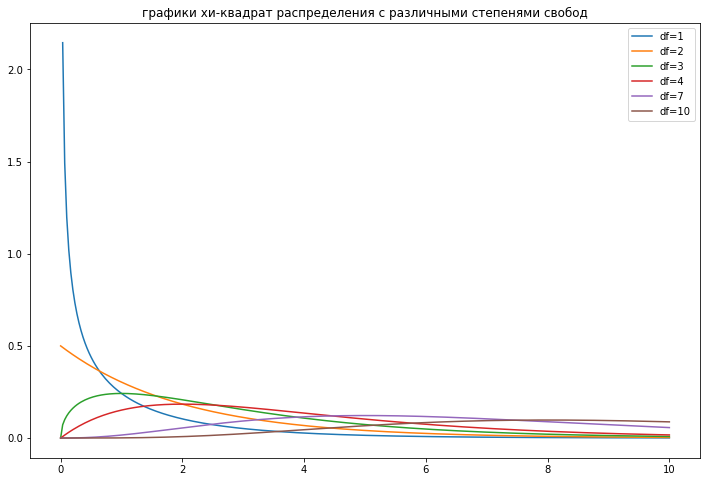

In [48]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

x = np.linspace(0, 10, 300)
# степеня свободы
df_set = {1, 2, 3, 4, 7, 10}

for df in df_set:
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f'df={df}')

plt.title('графики хи-квадрат распределения с различными степенями свобод')
plt.legend()
plt.show()

## Расчет p-уровня значимости

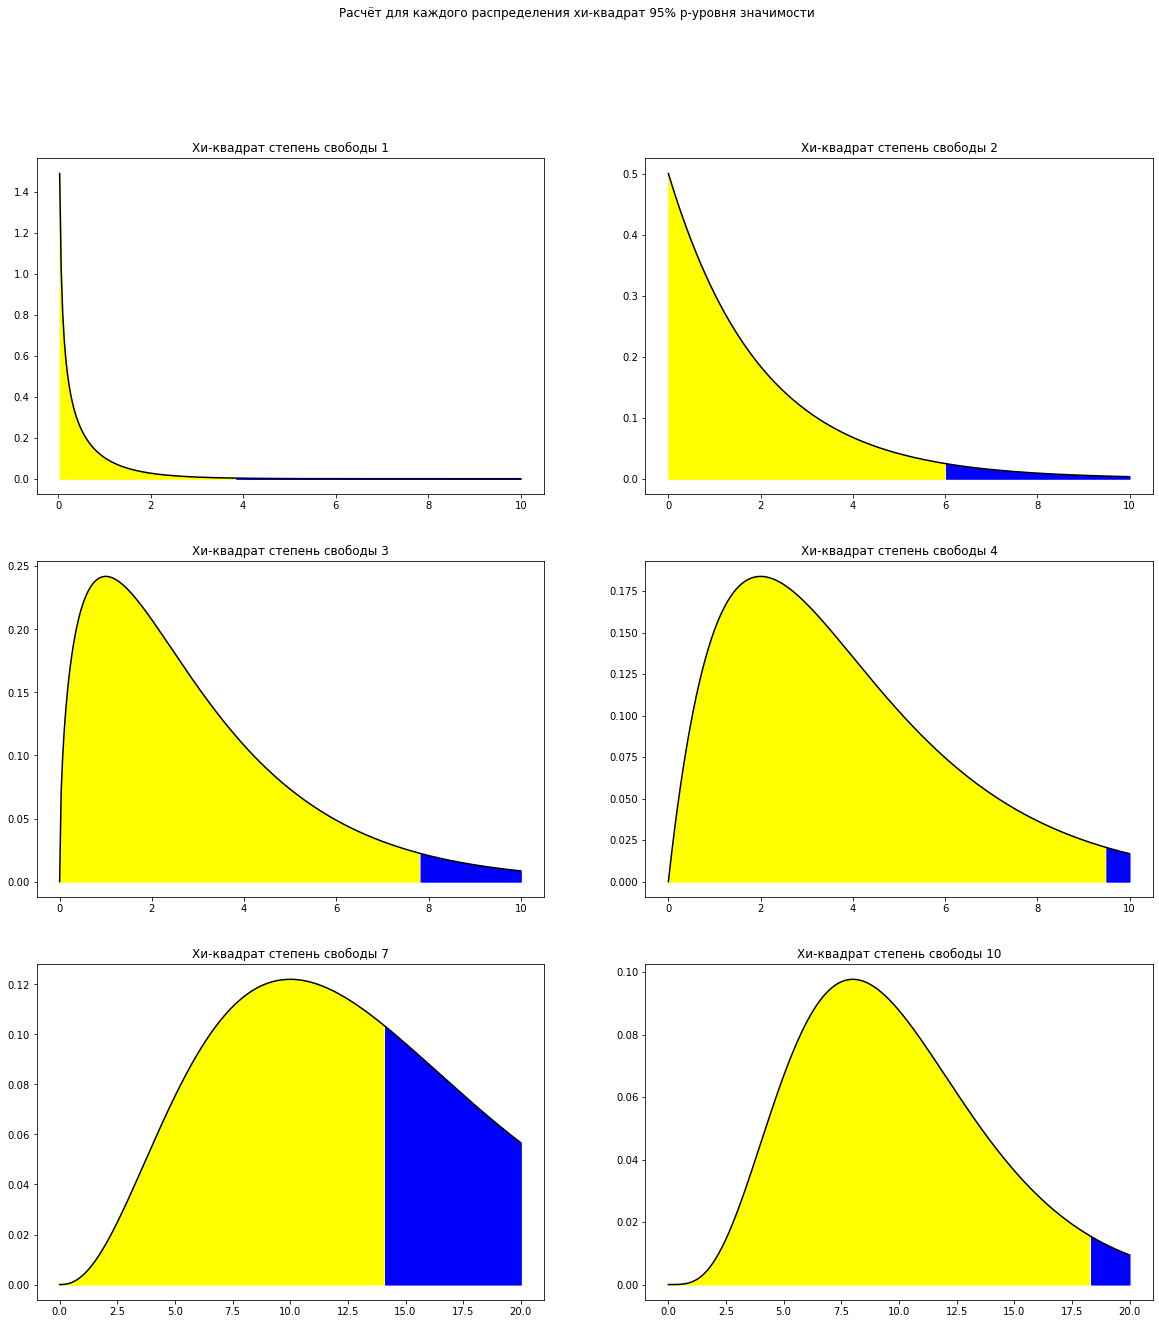

In [54]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 21)

p = 0.95
x1 = np.linspace(0, 10, 300)
x2 = np.linspace(0, 20, 300)

fig, axs = plt.subplots(nrows=3, ncols=2)
axs =  axs.flat

for i, df in enumerate(df_set):
    chi_value = chi2.isf(1-p, df=df)
    y = chi2.pdf(x, df=df)
    x = x1 if df <= 4 else x2
    
    axs[i].set_title(f'Хи-квадрат степень свободы {df}')
    axs[i].plot(x, y, color='k')
    left_x, right_x = x <= chi_value, x >= chi_value
    axs[i].fill_between(x[left_x], y[left_x], color='yellow')
    axs[i].fill_between(x[right_x], y[right_x], color='blue')


fig.suptitle('Расчёт для каждого распределения хи-квадрат 95% p-уровня значимости')
plt.show()

### Примеры.1.4
Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [58]:
from scipy.stats import chi2

print(f'{chi2.cdf(4, df=2) - chi2.cdf(2, df=2):.4f}')

0.2325


Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 15

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся p-уровень значимости. 

In [68]:
from scipy.stats import chi2
import numpy as np

observed = np.array([10, 10, 10, 5, 10, 15])

def chi_value(observed):
    # e - expected
    e = np.mean(observed)
    return sum([((o - e)**2)/e for o in observed])

p = chi2.sf(chi_value(observed), df=(observed.size-1))
print(f'{p:.4f}')

0.4159


Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости.

In [69]:
observed = np.array([15, 9])
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.2207


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [71]:
n=1500
observed = np.array([0.53*n, 0.47*n], dtype='int32')
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.0201


## Анализ таблиц сопряженности

## Точный критерий Фишера

<hr>

# Часть 2 Логистическая регрессия и непараметрические методы 

## Логистическая регрессия

### Постановка задачи

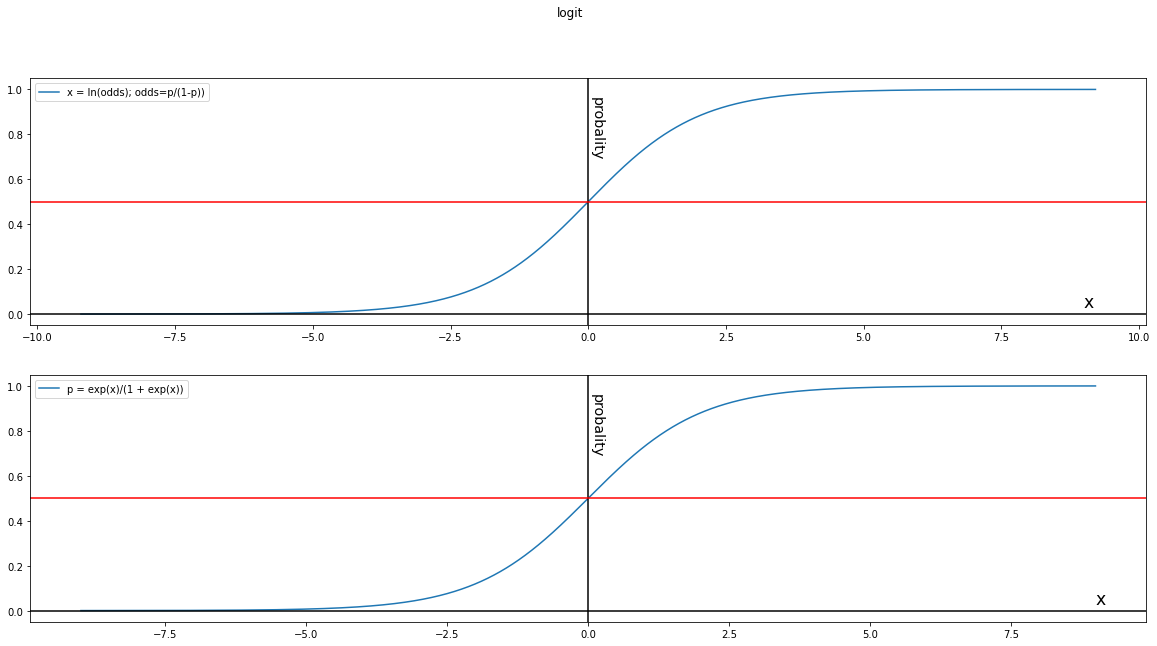

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def odds(p):
    '''Формула выпадения шансов от вероятности'''
    return p/(1-p)

def logit(x):
    return np.exp(x)/(1 + np.exp(x))

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

p1 = np.linspace(0, 1, 10000)
x1 = np.log(odds(p1))
x2 = np.linspace(-9, 9, 10000)
p2 = logit(x2)

ax1.plot(x1, p1, label='x = ln(odds); odds=p/(1-p))')
ax2.plot(x2, p2, label='p = exp(x)/(1 + exp(x))')


for ax in (ax1, ax2):
    # создадим оси    
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    # подпишем оси
    ax.text(9, 0.03, 'x', size='xx-large')
    ax.text(0.03, 0.7, 'probality', size='x-large', rotation=-90)
    ax.axhline(0.5, color='r')
    ax.legend()
    
fig.suptitle('logit')
plt.show()

## Модель без предикторов. Intercept only model

In [123]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
nSurvived = df.groupby('Survived')['Survived'].count()
nSurvived

Survived
0    549
1    342
Name: Survived, dtype: int64

In [163]:
y = df.Survived
# фиктиный предиктор (чтобы сделать модель без предиктора)
X = np.zeros((y.size, 1))

model = LogisticRegression()
clf = model.fit(X, y)
# шансы полученные из модели и вычисленные нами
odds_1 = np.exp(np.asscalar(clf.intercept_))
odds_2 = nSurvived[1]/nSurvived[0]
print(f'''
odds_1 {odds_1:.4f}
odds_2 {odds_2:.4f}
probability of Survival {(odds_1/(odds_1 + 1)):.4f}
''')


odds_1 0.6230
odds_2 0.6230
probability of Survival 0.3838



## Модель с одним номинативным предиктором

Таблица сопряжённости пола и выживаемости:

In [164]:
SexSurvived = pd.crosstab(df.Survived, df.Sex)
SexSurvived

Sex,female,male
Survived,,
0,81,468
1,233,109


In [172]:
y = df.Survived
# так как там были значения типа string, то надо перевести в номинативный тип
X, _ = pd.factorize(df.Sex)
# convert 1d array to column vector
X = X.reshape((-1, 1))

# penalty - это регулиризация, которая нас, в данный момент, не касается
model = LogisticRegression(penalty='none')
clf = model.fit(X, y)
print(f'''
coef:\t\t{np.asscalar(clf.coef_):.4f}
intercept:\t{np.asscalar(clf.intercept_):.4f}
''')


coef:		2.5137
intercept:	-1.4571



In [170]:
odds_f = SexSurvived['female'][1]/SexSurvived['female'][0]
odds_m = SexSurvived['male'][1]/SexSurvived['male'][0]
odds_fm = odds_f/odds_m
odds_mf = odds_m/odds_f
print(f'''
log(odds_f) = {np.log(odds_f):.4f}
log(odds_m) = {np.log(odds_m):.4f}
log(odds_fm) = {np.log(odds_fm):.4f}
log(odds_mf) = {np.log(odds_mf):.4f}
''')


log(odds_f) = 1.0566
log(odds_m) = -1.4571
log(odds_fm) = 2.5137
log(odds_mf) = -2.5137



В данном случае значение **odds_m** равно значению **intercept** в моделе и значит, что у мужчин было меньше шансов спастись (сексизм, да?!) на титанике.
А значение коэффициента (**coef**) равно отношению шансов спастись женщин, по отношению к мужчин **odds_fm** ( дофига больше шансов было у них:-( )  

## Модель с двумя номинативными предикторами

## Взаимодействие номинативных предикторов

## Когда нужно использовать непараметрические методы и почему?

## Непараметрические методы. Продолжение.

<hr>

# Часть 3 Кластерный анализ и метод главных компонент

## Кластерный анализ методом k-средних

[Сайт для визуализации k-means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

**кратко о k-means**
 - кластерный анализ это метод обучения **без учителя**, в отличие от регрессии
 - количество кластеров задаётся исследователем
 - кластеры задаются с помощью центроидов, которые стремяться в центр каждого кластера, и каждая точка кластера находится наиболее близко к своему центроиду.
 - центроид кластера - аналог центра масс в физике. Или же по аналогии, можно сказать, что центроиды это геометрический центр кластера.

**идея метода**
 - решаем на сколько кластеров будем делить наблюдения
 - случайно выбираем начальные позиции центроидов классов
 - выводим центроиды на наилучшие позиции
 - **Profit**
 
 <img src='img/k-means.gif' width=300/>
 

In [33]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


 - petal - лепесток
 - sepal - чашелистик (один из зеленых листочков, образующих чашечку цветка)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

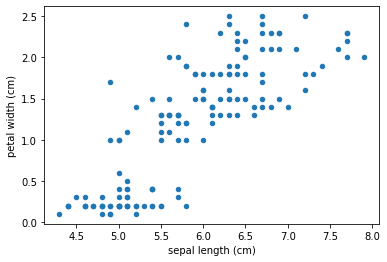

In [7]:
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)')

Можно предположить, о наличие трёх кластеров тут, попробуем определить их методом k-means.

In [21]:
from sklearn.cluster import KMeans

# определим метод
kmeans = KMeans(n_clusters=3)
# вырежем данные, которые нам нужны
data = df.loc[:, ['sepal length (cm)','petal width (cm)']]
# построим модель
model = kmeans.fit(data)
# получим кластеры
data['cluster'] = model.labels_
data.head()

,sepal length (cm),petal width (cm),cluster
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

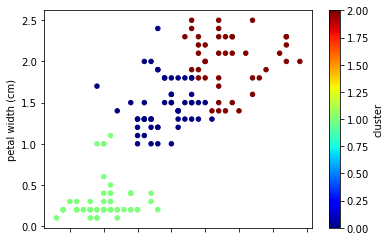

In [31]:
data.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='cluster', colormap='jet')

Теперь сравним с реальными видами ирисами, и увидем, что кластеры были разделенны довольно корректно.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

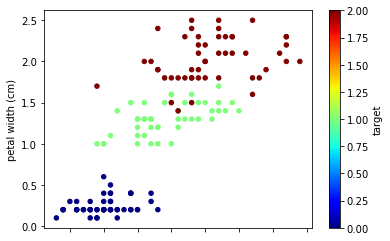

In [34]:
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='target', colormap='jet')

## Может-ли-кластерный-анализ-ошибаться?

## Как определить оптимальное число кластеров?

In [1]:
from pandas import DataFrame
from sklearn.cluster import KMeans

Data = {'x': [-3,1,2,3,5,6,7],
        'y': [3,4,6,8,2,11,1]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(1)
kmeans.fit(df)
print(kmeans.inertia_)

146.0


## Иерархическая кластеризация

## Введение в метод анализа главных компонент